In [86]:
# task 1:
'''importa db titanic.csv ed effettuiamo le seguenti analisi:

• Quanti ponti c'erano sulla nave?'''

from sqlalchemy import create_engine
import pandas as pd
import numpy as np

dbname = "Titanic"
username = 'studente_dapt'
port = "3306"
password = 'Ep1c0d3!!D4t4**4n4lys1s'
host = 'epicode-data-pt-mysql.cvetyjye2qbl.eu-central-1.rds.amazonaws.com'
conn_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"
db_engine = create_engine(conn_string)
query = """SELECT *
        FROM titanic
        """
df = pd.read_sql(query, db_engine)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# ricerca dati null e la loro percentuale
for column in df.columns:
    n_null = df[column].isna().sum()
    percentuale_null = round((n_null / df.shape[0]) * 100, 2)
    if percentuale_null > 0:
        print(column, 'contiene:', n_null,'dati null. Rappresentano il', percentuale_null,'% della colonna')

df

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.05,,S,0,10-4-1912
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,1,11-4-1912
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,0,10-4-1912
1307,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.05,,S,0,10-4-1912


<Axes: xlabel='PClass', ylabel='count'>

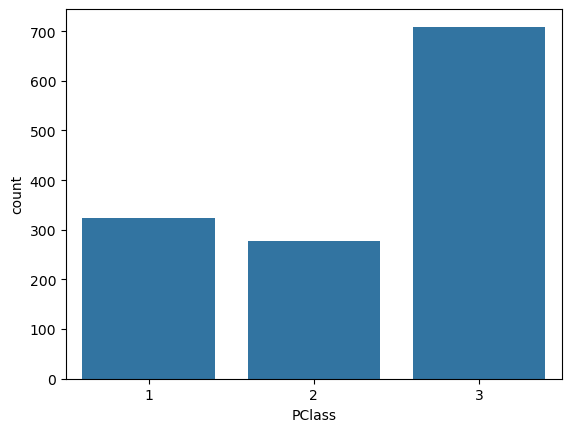

In [257]:
# task 2:
'''• Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco'''

import seaborn as sns

sns.countplot(data = df , x = 'PClass')

# alternativa con plot: df.groupby('PClass')['Name'].count().plot(kind='bar')
# sns.histplot(data = df, x = 'PClass')

<Axes: xlabel='Survived', ylabel='count'>

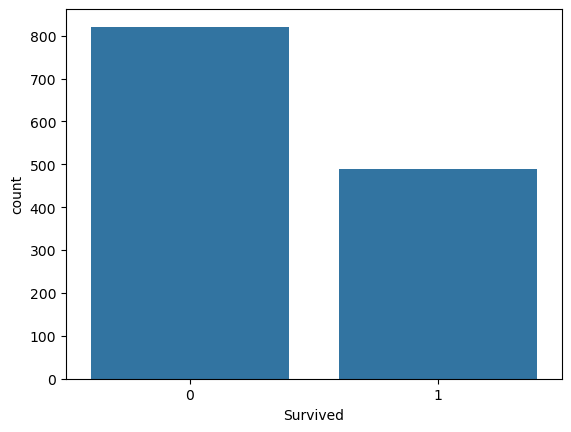

In [269]:
# task 3:
'''• Fare la stessa cosa per la colonna alive'''

sns.countplot(data = df, x = 'Survived')

<Axes: xlabel='Fare', ylabel='Count'>

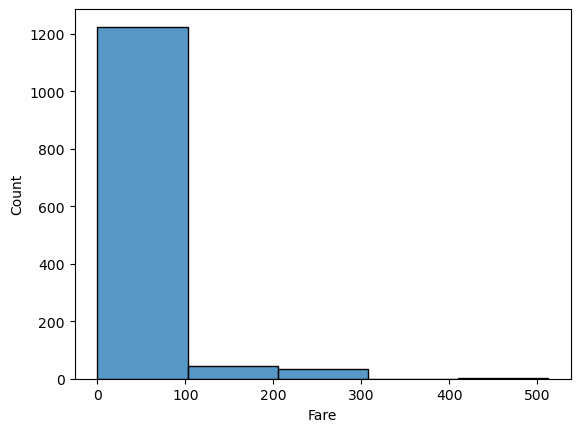

In [323]:
# task 4:
'''• Qual era la distribuzione delle tariffe (fare)?'''

# df['Fare'].value_counts()

sns.histplot(data = df, x = 'Fare', bins = 5)
# df.Fare.plot(kind = 'hist')

<Axes: xlabel='PClass', ylabel='Age'>

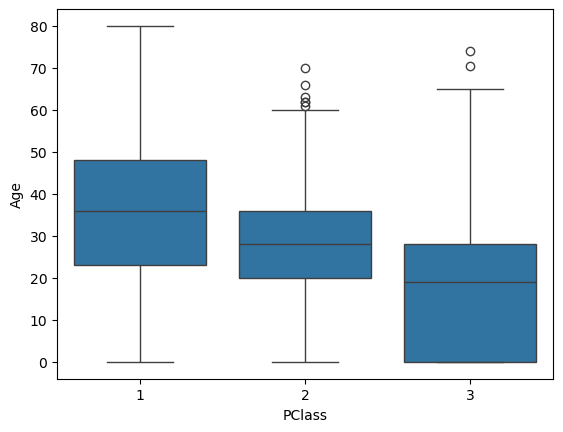

In [325]:
# task 5:
'''Riusciamo a vedere la distribuzione delle età dei passeggeri 
rispetto alla classe di imbarco? 
Proviamo con un boxplot e con un violinplot'''

sns.boxplot(data = df, y = 'Age', x = 'PClass')
# sns.violinplot(data = df, y = 'Age', x = 'PClass')

<Axes: xlabel='Survived', ylabel='Fare'>

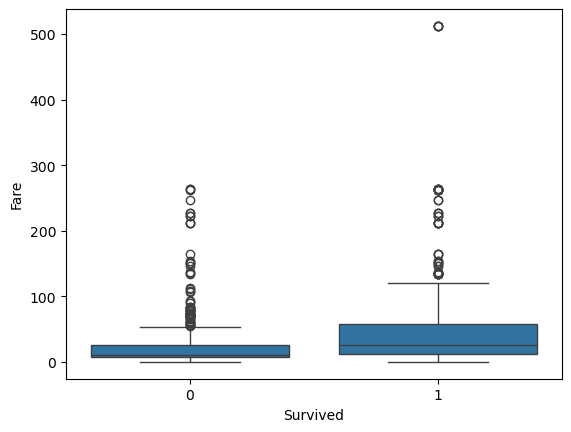

In [337]:
# task 6:
'''• Visualizziamo un boxplot rispetto alle colonne fare e survived; 
che cose ne deduciamo?'''

sns.boxplot(data = df, x = 'Survived', y = 'Fare')